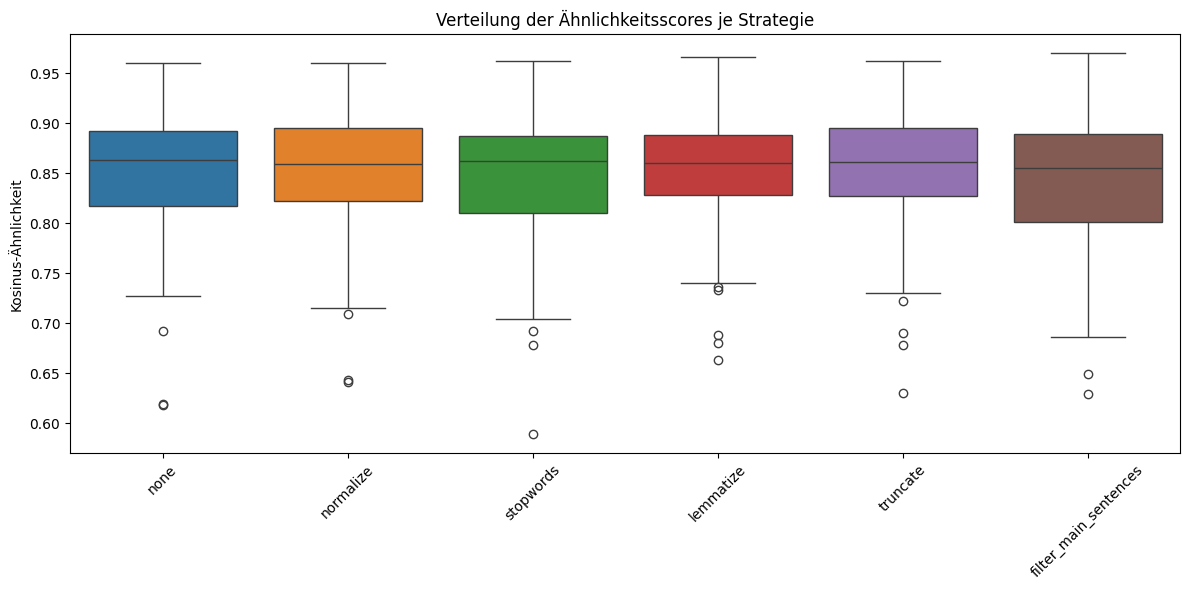

C:\Users\hp\AppData\Local\Temp\ipykernel_26380\3022222228.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


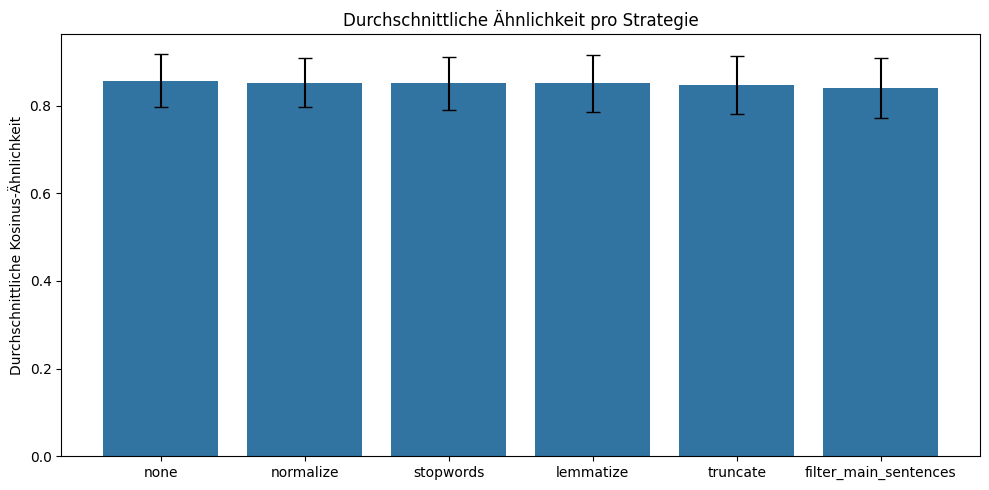

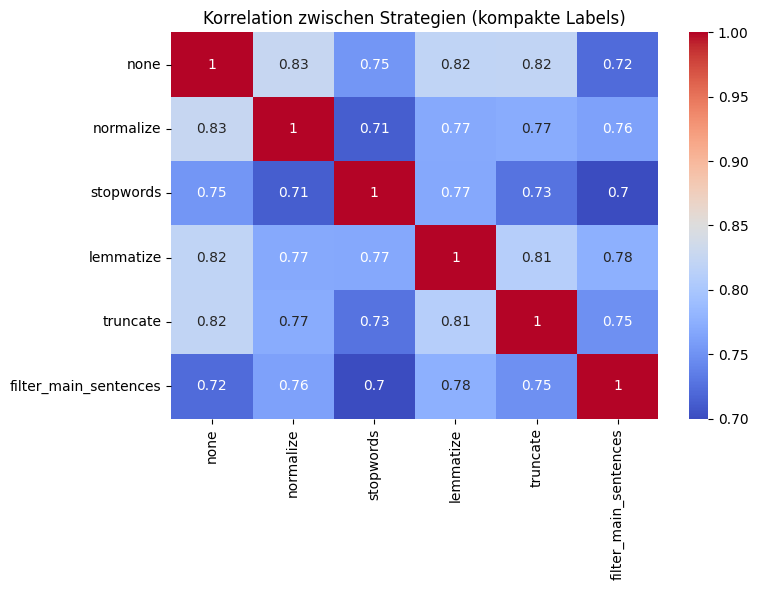

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
df = pd.read_csv("../results/evaluation_results1.csv")

# Spalten mit Similarity-Scores identifizieren
similarity_cols = [col for col in df.columns if col.endswith("_similarity")]

# Mapping für kompakte Labels
label_map = {
    "gpt_none_similarity": "none",
    "gpt_remove_special_chars+normalize_text_similarity": "normalize",
    "gpt_remove_stopwords_similarity": "stopwords",
    "gpt_lemmatize_similarity": "lemmatize",
    "gpt_truncate_tokens_similarity": "truncate",
    "gpt_filter_main_sentences_similarity": "filter_main_sentences"
}

# Neue Labels für Achsen
labels = [label_map.get(col, col) for col in similarity_cols]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[similarity_cols])
plt.title("Verteilung der Ähnlichkeitsscores je Strategie")
plt.ylabel("Kosinus-Ähnlichkeit")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.tight_layout()
plt.show()

# Balkendiagramm mit Mittelwerten und Standardabweichungen
summary_stats = df[similarity_cols].agg(["mean", "std"]).T
summary_stats = summary_stats.sort_values("mean", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=labels,
    y=summary_stats["mean"],
    ci=None
)
plt.errorbar(
    x=range(len(summary_stats)),
    y=summary_stats["mean"],
    yerr=summary_stats["std"],
    fmt='none',
    capsize=5,
    color='black'
)
plt.title("Durchschnittliche Ähnlichkeit pro Strategie")
plt.ylabel("Durchschnittliche Kosinus-Ähnlichkeit")
plt.tight_layout()
plt.show()

# Heatmap der Korrelationen mit kompakten Labels
corr = df[similarity_cols].corr()
corr.columns = labels
corr.index = labels

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=0.7, vmax=1)
plt.title("Korrelation zwischen Strategien (kompakte Labels)")
plt.tight_layout()
plt.show()
